In [9]:
import gdown

In [10]:
dataset_url="https://drive.google.com/uc?id=1l-gCh-73qIs4evhrGjcaYn-fHr9q_wa3"
filename="agriculture_train_data.csv"
gdown.download(dataset_url, filename)
# 1Y3f-N7EczMJMK8eBh4eH8H9SxNGfU8Wt

Downloading...
From: https://drive.google.com/uc?id=1l-gCh-73qIs4evhrGjcaYn-fHr9q_wa3
To: c:\Users\Asus\Desktop\MLearning Class\Tasks\eigthweetask\4thdaytask\agriculture_train_data.csv
100%|██████████| 2.91M/2.91M [00:01<00:00, 2.88MB/s]


'agriculture_train_data.csv'

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [14]:
df=pd.read_csv("agriculture_train_data.csv")
df.head()

,ID,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season,Crop_Damage
0,F00000001,188,1,0,1,0,0.0,0,1,0
1,F00000003,209,1,0,1,0,0.0,0,2,1
2,F00000004,257,1,0,1,0,0.0,0,2,1
3,F00000005,257,1,1,1,0,0.0,0,2,1
4,F00000006,342,1,0,1,0,0.0,0,2,1


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88858 entries, 0 to 88857
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       88858 non-null  object 
 1   Estimated_Insects_Count  88858 non-null  int64  
 2   Crop_Type                88858 non-null  int64  
 3   Soil_Type                88858 non-null  int64  
 4   Pesticide_Use_Category   88858 non-null  int64  
 5   Number_Doses_Week        88858 non-null  int64  
 6   Number_Weeks_Used        79858 non-null  float64
 7   Number_Weeks_Quit        88858 non-null  int64  
 8   Season                   88858 non-null  int64  
 9   Crop_Damage              88858 non-null  int64  
dtypes: float64(1), int64(8), object(1)
memory usage: 6.8+ MB


In [16]:
df.Number_Weeks_Used.isna().sum()

9000

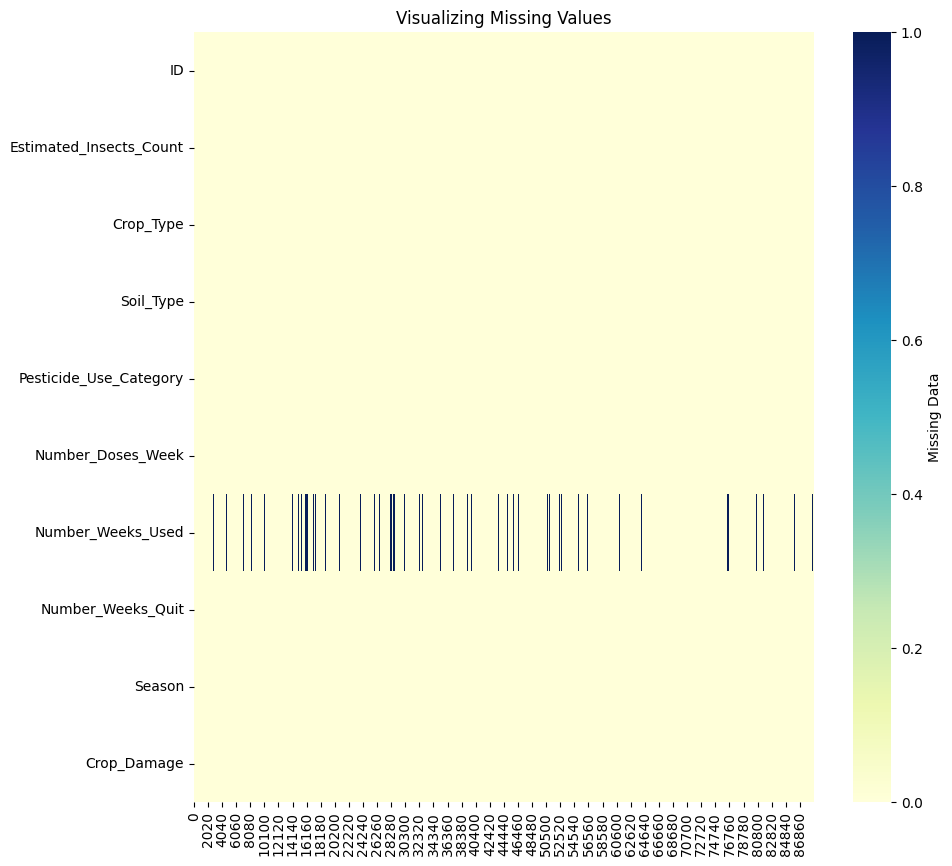

In [17]:
plt.figure(figsize=(10, 10))
plt.title("Visualizing Missing Values")
sns.heatmap(
    df.isna().transpose(),
    cmap="YlGnBu",  # Set a yellow -> green -> blue color gradient
    cbar_kws={"label": "Missing Data"}
)
plt.show()

In [18]:
df.Soil_Type.value_counts()

Soil_Type
0    48124
1    40734
Name: count, dtype: int64

In [19]:
df.Crop_Type.value_counts()

Crop_Type
0    63589
1    25269
Name: count, dtype: int64

In [20]:
df.Pesticide_Use_Category.value_counts()

Pesticide_Use_Category
2    63709
3    24312
1      837
Name: count, dtype: int64

In [21]:
df.columns

Index(['ID', 'Estimated_Insects_Count', 'Crop_Type', 'Soil_Type',
       'Pesticide_Use_Category', 'Number_Doses_Week', 'Number_Weeks_Used',
       'Number_Weeks_Quit', 'Season', 'Crop_Damage'],
      dtype='object')

In [22]:
df.Season.value_counts()

Season
2    44210
1    26902
3    17746
Name: count, dtype: int64

In [23]:
df.Number_Weeks_Quit.value_counts()

Number_Weeks_Quit
0     27274
10     2893
5      2831
2      2743
12     2701
15     2668
1      2620
14     2610
6      2584
3      2578
4      2528
13     2485
7      2418
8      2294
20     2209
16     2108
11     2090
18     2030
17     2018
9      1897
19     1841
21     1436
22     1414
23     1166
25     1109
24     1054
26      894
27      820
28      808
30      751
29      719
31      530
32      505
33      370
34      345
35      301
36      248
37      221
38      162
40      133
39      109
41       86
42       75
43       51
44       38
45       30
46       22
47       21
48       10
50        6
49        4
Name: count, dtype: int64

In [24]:
df.Crop_Damage.value_counts()

Crop_Damage
0    74238
1    12307
2     2313
Name: count, dtype: int64

In [25]:
def bivariate_barplot(data, xlabel, ylabel="Frequency", xlabel_rotation=0):
    # Set font size
    sns.set(font_scale=1.4)

    ax = df.groupby([xlabel, "Crop_Damage"]).size().unstack().plot.bar(
        stacked=True,
        # Set a categorical color palette
        color=sns.color_palette("Set2"),
        # Set a figure size
        figsize=(10, 10),
        # Rotate the x-axis labels for proper orientation
        rot=xlabel_rotation,
    )

    ax.set_xlabel(xlabel, labelpad=14)
    ax.set_ylabel(ylabel, labelpad=14)

In [27]:
df.groupby("Crop_Type")["Crop_Damage"].agg(["sum", "size"])

,sum,size
Crop_Type,,
0,12418,63589
1,4515,25269


In [28]:
def calculate_feature_impact_probability(data, feature, label="Crop_Damage"):
    feature_impact = df.groupby(feature)[label].agg(["sum", "size"])
    feature_impact_probability = feature_impact["sum"] / feature_impact["size"] * 100
    return feature_impact_probability


In [29]:
calculate_feature_impact_probability(df,'Crop_Type')

Crop_Type
0    19.528535
1    17.867743
dtype: float64

In [30]:
df.columns

Index(['ID', 'Estimated_Insects_Count', 'Crop_Type', 'Soil_Type',
       'Pesticide_Use_Category', 'Number_Doses_Week', 'Number_Weeks_Used',
       'Number_Weeks_Quit', 'Season', 'Crop_Damage'],
      dtype='object')

In [31]:
categorical_features=['Crop_Type', 'Soil_Type',
       'Pesticide_Use_Category', 'Season']

In [32]:
numerical_features=['Estimated_Insects_Count', 'Number_Doses_Week', 'Number_Weeks_Quit']

In [33]:
from ipywidgets import interact

In [34]:
@interact(predictor=categorical_features)
def interactive_bivariate_barplot(predictor):
    bivariate_barplot(df, predictor)

interactive(children=(Dropdown(description='predictor', options=('Crop_Type', 'Soil_Type', 'Pesticide_Use_Cate…

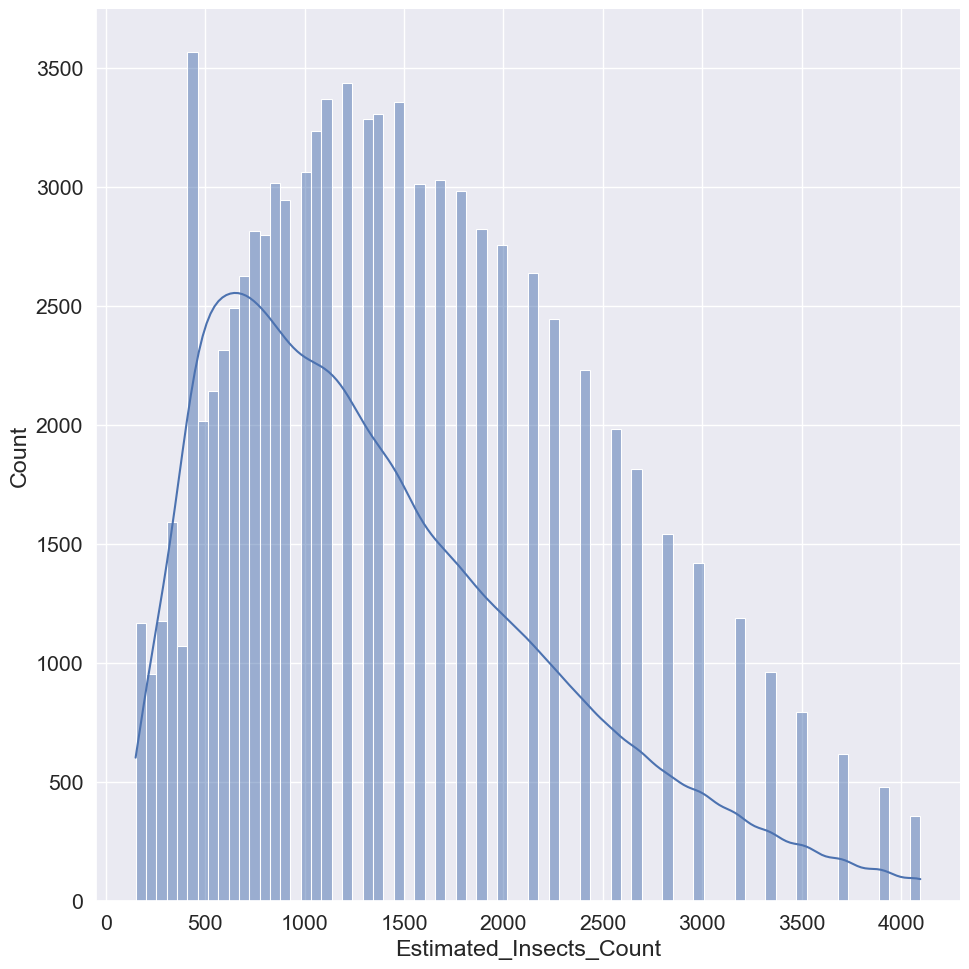

In [35]:
sns.displot(data=df.Estimated_Insects_Count, kde=True, height=10)

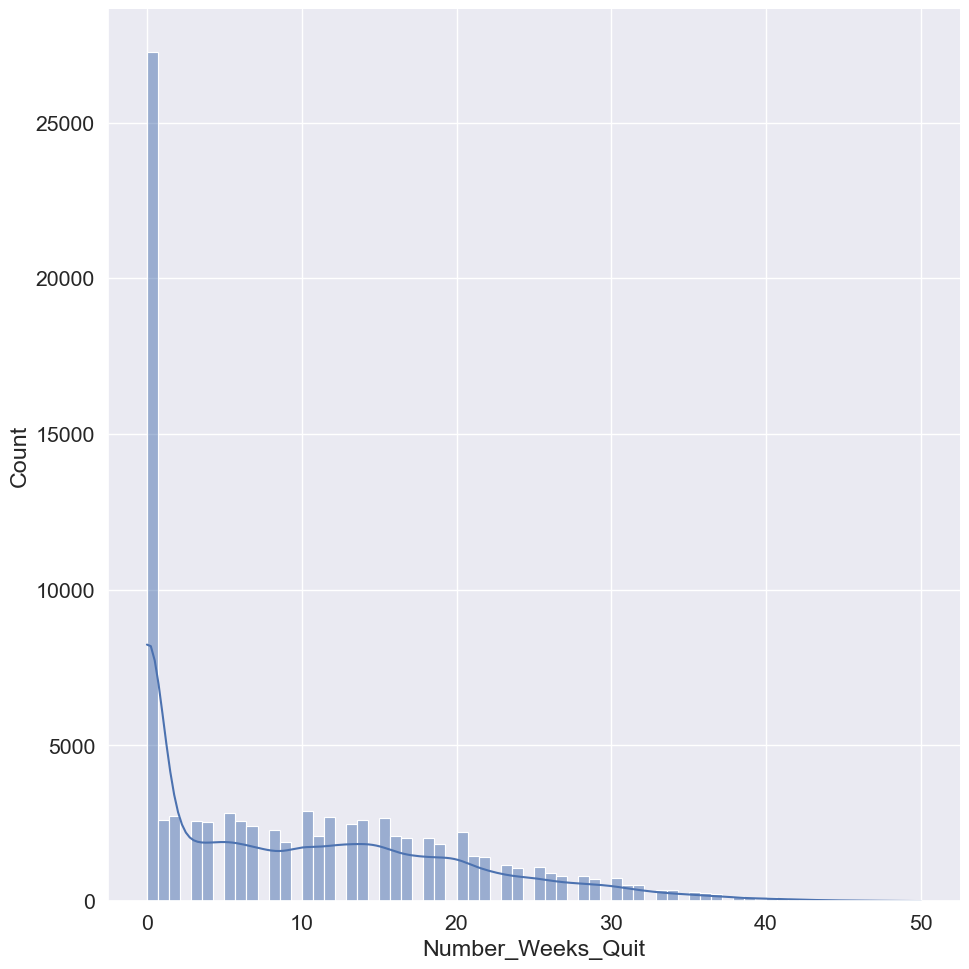

In [36]:
sns.displot(data=df.Number_Weeks_Quit , kde=True, height=10)

<Axes: ylabel='Number_Weeks_Quit'>

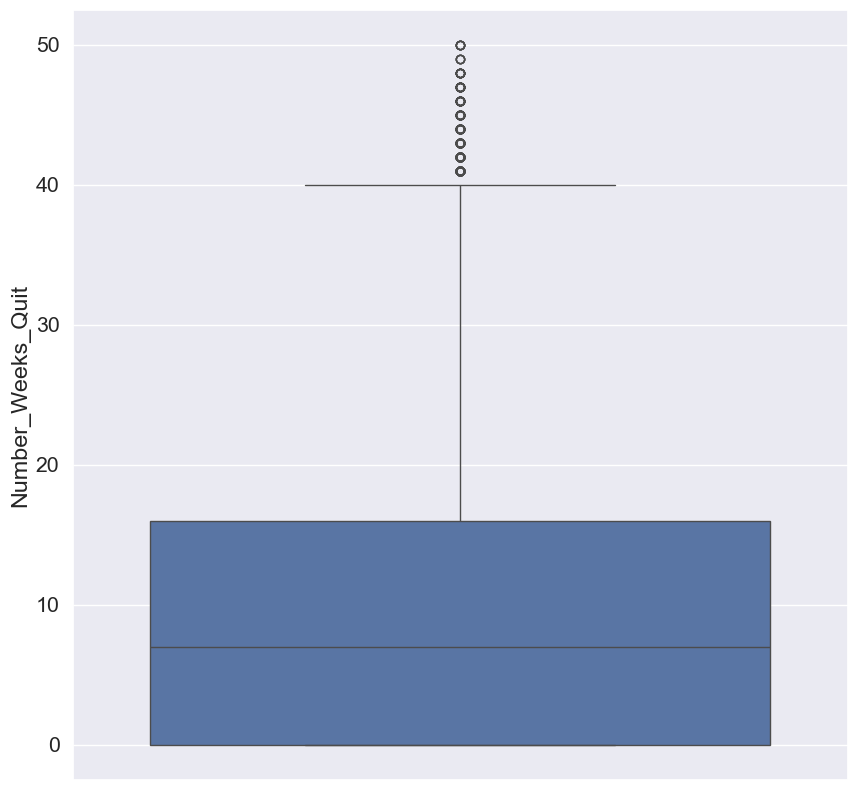

In [37]:
plt.figure(figsize=(10, 10))
sns.boxplot(data=df.Number_Weeks_Quit)

<Axes: ylabel='Estimated_Insects_Count'>

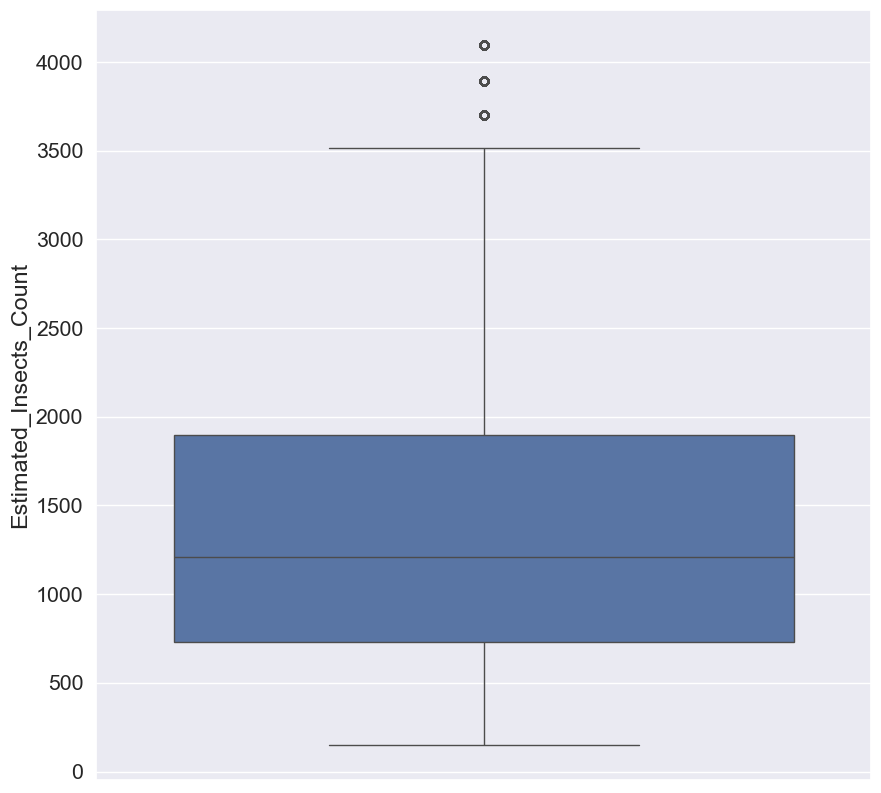

In [38]:
plt.figure(figsize=(10, 10))
sns.boxplot(data=df.Estimated_Insects_Count)

In [39]:
from sklearn.model_selection import train_test_split

In [40]:
target_variable='Crop_Damage'

In [42]:
X = df[categorical_features + numerical_features].copy()
y = df[target_variable].copy()

In [43]:
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    # To distribute each class in the train and test set evenly
    stratify=y,
    # Take a test size of 20%
    test_size=0.2,
    # Set a seed so that we can reproduce the result
    random_state=42,
)
X_train.reset_index(drop=True,inplace=True)
X_test.reset_index(drop=True,inplace=True)
y_train.reset_index(drop=True,inplace=True)
y_test.reset_index(drop=True,inplace=True)

In [44]:
y_train_counts = y_train.value_counts()
y_train_counts / y_train_counts.sum() * 100

Crop_Damage
0    83.546690
1    13.850829
2     2.602482
Name: count, dtype: float64

In [46]:
y_test_counts = y_test.value_counts()
y_test_counts / y_test_counts.sum() * 100

Crop_Damage
0    83.547153
1    13.847625
2     2.605222
Name: count, dtype: float64

In [47]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression()

In [48]:
clf.fit(X_train, y_train)

c:\Users\Asus\Desktop\MLearning Class\virtualenv\environment\lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [59]:
pred=clf.predict(X_test)

In [58]:
clf.score(X_test,y_test)

0.8344024307900068

In [57]:
from sklearn.model_selection import RandomizedSearchCV

In [56]:
param_grid = [    
    {'penalty' : ['l1', 'l2', 'elasticnet', 'none'],
    'C' : np.logspace(-4, 4, 20),
    'solver' : ['lbfgs','newton-cg','liblinear','sag','saga'],
    'max_iter' : [100, 1000,2500, 5000]
    }
]

In [60]:
random = RandomizedSearchCV(estimator = LogisticRegression(), param_distributions = param_grid, cv = 3, verbose = 2,
                  n_jobs = -1 )

In [61]:
random.fit(X_train, y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


c:\Users\Asus\Desktop\MLearning Class\virtualenv\environment\lib\site-packages\sklearn\model_selection\_validation.py:547: FitFailedWarning: 
18 fits failed out of a total of 30.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
10 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\Asus\Desktop\MLearning Class\virtualenv\environment\lib\site-packages\sklearn\model_selection\_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\Asus\Desktop\MLearning Class\virtualenv\environment\lib\site-packages\sklearn\base.py", line 1467, in wrapper
    estimator._validate_params()
  File "c:\Users\Asus\Desktop\MLearning Class\virtualenv\environment\lib\site-

RandomizedSearchCV(cv=3, estimator=LogisticRegression(), n_jobs=-1,
                   param_distributions=[{'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                         'max_iter': [100, 1000, 2500, 5000],
                                         'penalty': ['l1', 'l2', 'elasticnet',
                                                     'none'],
                                         'solver': ['lbfgs', 'newton-cg',
                                                    'liblinear', 'sag',
                                                    'saga']}],
                   verbose=2)

In [62]:
print (f'Accuracy - : {random.score(X_test,y_test):.3f}')

Accuracy - : 0.835


C:\Users\Asus\AppData\Local\Temp\ipykernel_17252\1210950619.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_test - predictions)


<Axes: xlabel='Crop_Damage', ylabel='Density'>

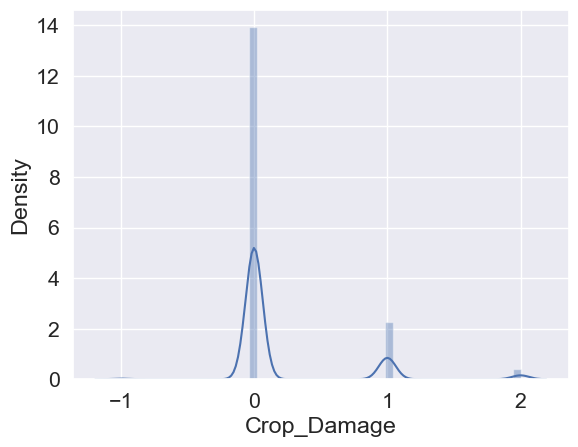

In [63]:
predictions = random.predict(X_test)
sns.distplot(y_test - predictions)

In [64]:
test_df=pd.read_csv('test.csv')
test_df.head()

,ID,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season
0,F00000002,188,1,1,1,0,NaN,0,2
1,F00000007,410,1,1,1,0,0.0,0,2
2,F00000011,626,1,0,1,0,0.0,0,2
3,F00000013,731,1,0,1,0,0.0,0,2
4,F00000014,789,0,0,1,0,0.0,0,1


In [66]:
test_df.columns

Index(['ID', 'Estimated_Insects_Count', 'Crop_Type', 'Soil_Type',
       'Pesticide_Use_Category', 'Number_Doses_Week', 'Number_Weeks_Used',
       'Number_Weeks_Quit', 'Season'],
      dtype='object')

In [67]:
test_df.drop(['ID','Number_Weeks_Used'],axis=1,inplace=True)

In [68]:
X_test.columns

Index(['Crop_Type', 'Soil_Type', 'Pesticide_Use_Category', 'Season',
       'Estimated_Insects_Count', 'Number_Doses_Week', 'Number_Weeks_Quit'],
      dtype='object')

In [69]:
test_df=test_df[['Crop_Type', 'Soil_Type', 'Pesticide_Use_Category', 'Season',
       'Estimated_Insects_Count', 'Number_Doses_Week', 'Number_Weeks_Quit']]

In [70]:
test_df.head()

,Crop_Type,Soil_Type,Pesticide_Use_Category,Season,Estimated_Insects_Count,Number_Doses_Week,Number_Weeks_Quit
0,1,1,1,2,188,0,0
1,1,1,1,2,410,0,0
2,1,0,1,2,626,0,0
3,1,0,1,2,731,0,0
4,0,0,1,1,789,0,0


In [71]:
Crop_Damage_test=random.predict(test_df)

In [72]:
result=pd.Series(Crop_Damage_test)
result.value_counts()

0    58766
1      544
Name: count, dtype: int64